Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# Experiment 7 - Node2Vec Parameter Tests

**Referenzen**<br />
[1] https://snap.stanford.edu/node2vec<br />
[2] https://stellargraph.readthedocs.io/en/stable/demos/link-prediction/node2vec-link-prediction.html<br />



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from gml.graph.data_factory import TestTrainDataFactory
from gml.graph.graph_embedding import EdgeEmbedding
%matplotlib inline

## 7.1 Data Structure

### Datensammlung - Mitarbeiter mit Organisation

<img src="img/test-6.png" alt="Test Scenario 4" width="800"/>

## 7.2 Test Node2Vec Window Size with RandomForestClassifier

### Test and Train

In [2]:
n = 100

graph, test_graph, test_samples, test_labels, train_graph, train_samples, train_labels\
    = TestTrainDataFactory().create_testdata(n, add_predict_edges=True)

measures   = []
classifier = RandomForestClassifier
windows    = [1,2,3,4,5,6,7,8,9,10]
dimensions = 16

for window in windows:
    # create embeddings
    embeddings =  EdgeEmbedding(graph.graph, window=window, dimensions=dimensions).embeddings
    test_embeddings  = [embeddings[str(x[0]),str(x[1])] for x in test_samples]
    train_embeddings = [embeddings[str(x[0]),str(x[1])] for x in train_samples]
    # init scores
    index = ["Precision", "Recall", "F1-Score"]
    score = {}
    # train
    c = classifier(n_estimators=1000)
    c.fit(train_embeddings, train_labels)
    # test
    y_pred = c.predict(test_embeddings)
    # calculate and show scores
    name = "Window Size " + str(window)
    score[name] = [
        metrics.precision_score(test_labels, y_pred),
        metrics.recall_score(test_labels, y_pred),
        metrics.f1_score(test_labels, y_pred)
    ]
    df = pd.DataFrame(score, index=index)
    print(df)
    # add score to overall measures
    measures.append(score)

Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


           Window Size 1
Precision           0.40
Recall              0.24
F1-Score            0.30


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


           Window Size 2
Precision       0.923077
Recall          0.960000
F1-Score        0.941176


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


           Window Size 3
Precision       0.961538
Recall          1.000000
F1-Score        0.980392


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


           Window Size 4
Precision       0.980392
Recall          1.000000
F1-Score        0.990099


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]


           Window Size 5
Precision       0.909091
Recall          1.000000
F1-Score        0.952381


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


           Window Size 6
Precision       0.980392
Recall          1.000000
F1-Score        0.990099


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


           Window Size 7
Precision       0.942308
Recall          0.980000
F1-Score        0.960784


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


           Window Size 8
Precision           0.98
Recall              0.98
F1-Score            0.98


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


           Window Size 9
Precision       0.980392
Recall          1.000000
F1-Score        0.990099


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


           Window Size 10
Precision        0.961538
Recall           1.000000
F1-Score         0.980392


### Show results

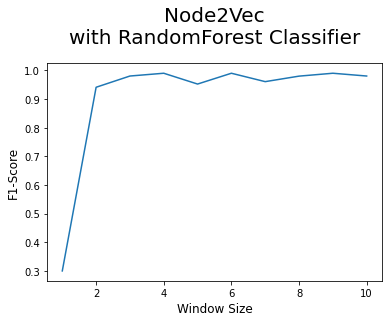

In [3]:
ws = []     # window size as x-axis
f1 = []     # f1 score as y values

for i, score in enumerate(measures):
    ws.append(i+1)
    for k, v in score.items():
        f1.append(v[2])

plt.figure()
plt.title("Node2Vec\nwith RandomForest Classifier", fontsize=20, pad=20)
plt.xlabel("Window Size", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.plot(ws,f1)
plt.show()

## 7.3 Test Node2Vec Dimensions with RandomForestClassifier

### Test and Train


In [4]:
n = 100

graph, test_graph, test_samples, test_labels, train_graph, train_samples, train_labels\
    = TestTrainDataFactory().create_testdata(n, add_predict_edges=True)

measures   = []
classifier = RandomForestClassifier
windows    = 8
dimensions = [2,4,8,16,32,64,128]

for dimension in dimensions:
    # create embeddings
    embeddings =  EdgeEmbedding(graph.graph, window=window, dimensions=dimension).embeddings
    test_embeddings  = [embeddings[str(x[0]),str(x[1])] for x in test_samples]
    train_embeddings = [embeddings[str(x[0]),str(x[1])] for x in train_samples]
    # init scores
    index = ["Precision", "Recall", "F1-Score"]
    score = {}
    # train
    c = classifier(n_estimators=1000)
    c.fit(train_embeddings, train_labels)
    # test
    y_pred = c.predict(test_embeddings)
    # calculate and show scores
    name = "Dimension " + str(dimension)
    score[name] = [
        metrics.precision_score(test_labels, y_pred),
        metrics.recall_score(test_labels, y_pred),
        metrics.f1_score(test_labels, y_pred)
    ]
    df = pd.DataFrame(score, index=index)
    print(df)
    # add score to overall measures
    measures.append(score)

Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


           Dimension 2
Precision     0.711111
Recall        0.640000
F1-Score      0.673684


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


           Dimension 4
Precision     0.909091
Recall        0.800000
F1-Score      0.851064


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


           Dimension 8
Precision     0.830508
Recall        0.980000
F1-Score      0.899083


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


           Dimension 16
Precision      0.961538
Recall         1.000000
F1-Score       0.980392


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


           Dimension 32
Precision           1.0
Recall              1.0
F1-Score            1.0


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


           Dimension 64
Precision           1.0
Recall              1.0
F1-Score            1.0


Computing transition probabilities:   0%|          | 0/602 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


           Dimension 128
Precision            1.0
Recall               1.0
F1-Score             1.0


### Show results

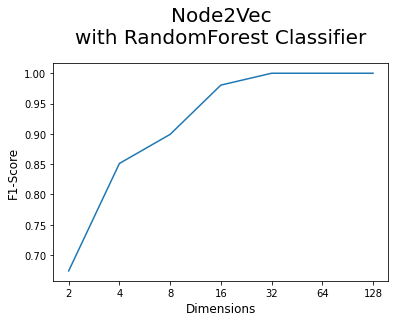

In [5]:
dim = []    # dimension as x-axis
f1 = []     # f1 score as y values

for score in measures:
    for k, v in score.items():
        _, d = k.split()
        dim.append(d)
        f1.append(v[2])

plt.figure()
plt.title("Node2Vec\nwith RandomForest Classifier", fontsize=20, pad=20)
plt.xlabel("Dimensions", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.plot(dim,f1)
plt.show()


---
_The end._